# How does the Computer "see" the Defects, and how does the Computer see OK parts 

In [1]:
#import the tf library
import tensorflow as tf


# load saved model best_image_classification_model.h5
model = tf.keras.models.load_model('best_image_classification_model.h5')

/Users/javie/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


OSError: No file or directory found at best_image_classification_model.h5

Selected OK Images: ['cast_ok_0_4498.jpeg', 'cast_ok_0_2867.jpeg']
Selected Defective Images: ['cast_def_0_939.jpeg', 'cast_def_0_456.jpeg']
1/1 [==============================] - 0s 10ms/step


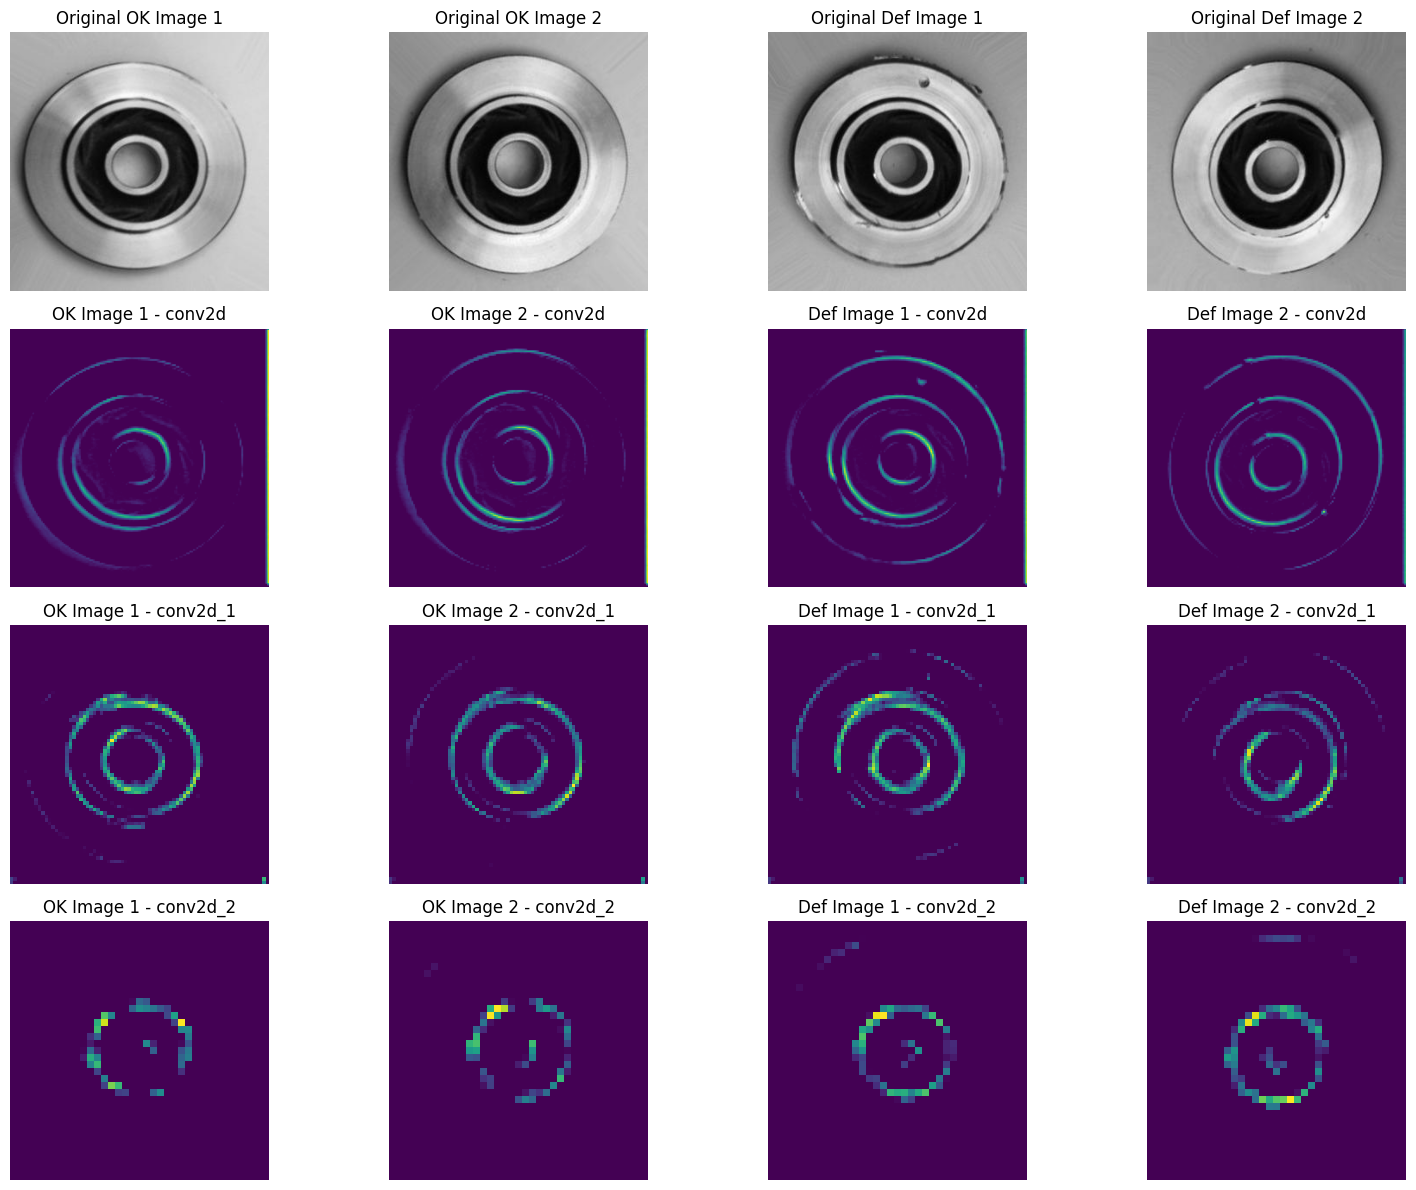

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing import image

# Directories for images
ok_dir = 'Pictures/test/ok_front'
def_dir = 'Pictures/test/def_front'

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(300, 300)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize image
    return img_array

# Function to load the original image for display
def load_original_image(img_path, target_size=(300, 300)):
    img = image.load_img(img_path, target_size=target_size)
    return image.img_to_array(img).astype(np.uint8)

# Step 1: Randomly select 2 images from OK and 2 from Defective
ok_images = os.listdir(ok_dir)
def_images = os.listdir(def_dir)

random_ok_images = random.sample(ok_images, 2)  # Select 2 OK images
random_def_images = random.sample(def_images, 2)  # Select 2 Defective images

ok_image_paths = [os.path.join(ok_dir, img) for img in random_ok_images]
def_image_paths = [os.path.join(def_dir, img) for img in random_def_images]

print(f"Selected OK Images: {random_ok_images}")
print(f"Selected Defective Images: {random_def_images}")

# Step 2: Create a model that outputs the activations of the convolutional layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Step 3: Function to visualize original images and activations side by side (2 OK vs 2 Defective)
def visualize_feature_maps_with_original(ok_image_paths, def_image_paths, ok_activations_list, def_activations_list, model_layers):
    plt.figure(figsize=(16, 12))

    # Display the original OK images
    for j, ok_image_path in enumerate(ok_image_paths):
        original_image = load_original_image(ok_image_path)
        plt.subplot(4, 4, j + 1)
        plt.imshow(original_image.astype(np.uint8))
        plt.axis('off')
        plt.title(f"Original OK Image {j + 1}")

    # Display the original Defective images
    for j, def_image_path in enumerate(def_image_paths):
        original_image = load_original_image(def_image_path)
        plt.subplot(4, 4, j + 3)
        plt.imshow(original_image.astype(np.uint8))
        plt.axis('off')
        plt.title(f"Original Def Image {j + 1}")

    # For each CNN layer, visualize the first feature map for each OK and Defective image
    for i, layer_name in enumerate([layer.name for layer in model_layers if 'conv' in layer.name][:3]):
        # Visualize 2 OK images' feature maps
        for j, ok_activations in enumerate(ok_activations_list):
            ok_first_feature_map = ok_activations[i][0, :, :, 0]  # First feature map of the OK image
            plt.subplot(4, 4, (i + 1) * 4 + j + 1)
            plt.imshow(ok_first_feature_map, cmap='viridis')
            plt.axis('off')
            plt.title(f"OK Image {j + 1} - {layer_name}")

        # Visualize 2 Defective images' feature maps
        for j, def_activations in enumerate(def_activations_list):
            def_first_feature_map = def_activations[i][0, :, :, 0]  # First feature map of the Defective image
            plt.subplot(4, 4, (i + 1) * 4 + j + 3)
            plt.imshow(def_first_feature_map, cmap='viridis')
            plt.axis('off')
            plt.title(f"Def Image {j + 1} - {layer_name}")

    plt.tight_layout()
    plt.show()

# Step 4: Preprocess and get activations for the 2 OK images
ok_activations_list = [activation_model.predict(preprocess_image(img_path)) for img_path in ok_image_paths]

# Step 5: Preprocess and get activations for the 2 Defective images
def_activations_list = [activation_model.predict(preprocess_image(img_path)) for img_path in def_image_paths]

# Step 6: Visualize original images and feature maps for the 2 OK and 2 Defective images
visualize_feature_maps_with_original(ok_image_paths, def_image_paths, ok_activations_list, def_activations_list, model.layers)

Selected OK Images: ['cast_ok_0_3264.jpeg', 'cast_ok_0_5567.jpeg']
Selected Defective Images: ['cast_def_0_224.jpeg', 'cast_def_0_3108.jpeg']
1/1 [==============================] - 0s 10ms/step


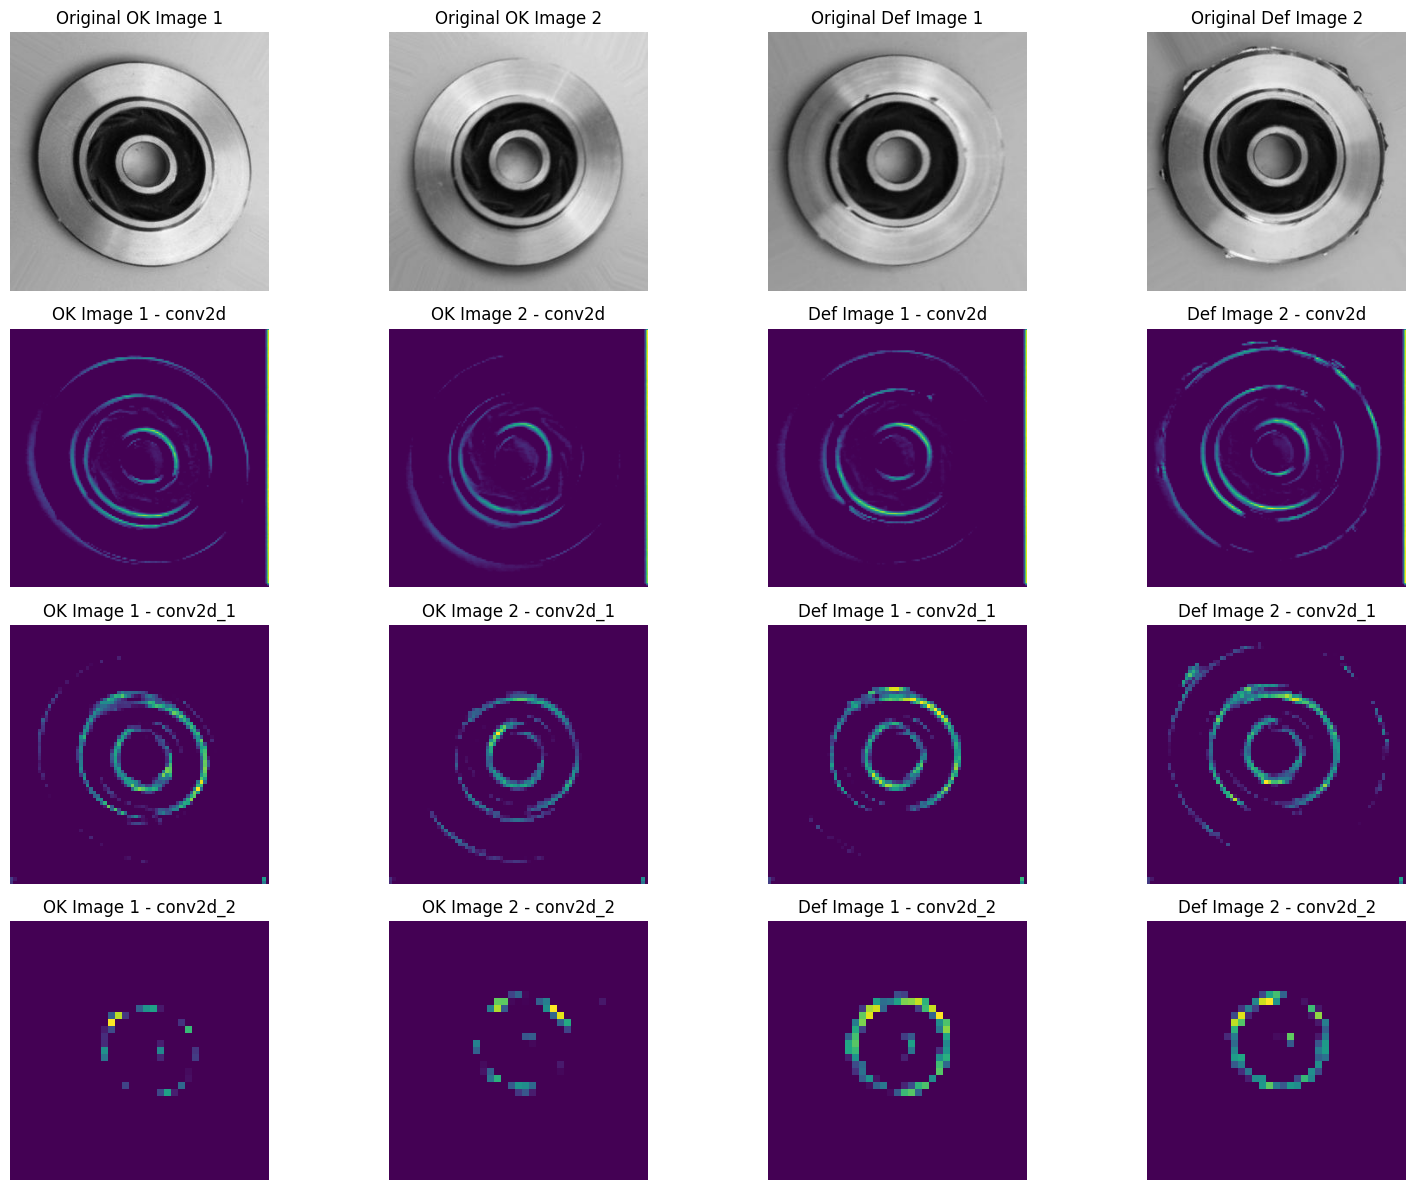

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing import image

# Directories for images
ok_dir = 'Pictures/test/ok_front'
def_dir = 'Pictures/test/def_front'

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(300, 300)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize image
    return img_array

# Function to load the original image for display
def load_original_image(img_path, target_size=(300, 300)):
    img = image.load_img(img_path, target_size=target_size)
    return image.img_to_array(img).astype(np.uint8)

# Step 1: Randomly select 2 images from OK and 2 from Defective
ok_images = os.listdir(ok_dir)
def_images = os.listdir(def_dir)

random_ok_images = random.sample(ok_images, 2)  # Select 2 OK images
random_def_images = random.sample(def_images, 2)  # Select 2 Defective images

ok_image_paths = [os.path.join(ok_dir, img) for img in random_ok_images]
def_image_paths = [os.path.join(def_dir, img) for img in random_def_images]

print(f"Selected OK Images: {random_ok_images}")
print(f"Selected Defective Images: {random_def_images}")

# Step 2: Create a model that outputs the activations of the convolutional layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Step 3: Function to visualize original images and activations side by side (2 OK vs 2 Defective)
def visualize_feature_maps_with_original(ok_image_paths, def_image_paths, ok_activations_list, def_activations_list, model_layers):
    plt.figure(figsize=(16, 12))

    # Display the original OK images
    for j, ok_image_path in enumerate(ok_image_paths):
        original_image = load_original_image(ok_image_path)
        plt.subplot(4, 4, j + 1)
        plt.imshow(original_image.astype(np.uint8))
        plt.axis('off')
        plt.title(f"Original OK Image {j + 1}")

    # Display the original Defective images
    for j, def_image_path in enumerate(def_image_paths):
        original_image = load_original_image(def_image_path)
        plt.subplot(4, 4, j + 3)
        plt.imshow(original_image.astype(np.uint8))
        plt.axis('off')
        plt.title(f"Original Def Image {j + 1}")

    # For each CNN layer, visualize the first feature map for each OK and Defective image
    for i, layer_name in enumerate([layer.name for layer in model_layers if 'conv' in layer.name][:3]):
        # Visualize 2 OK images' feature maps
        for j, ok_activations in enumerate(ok_activations_list):
            ok_first_feature_map = ok_activations[i][0, :, :, 0]  # First feature map of the OK image
            plt.subplot(4, 4, (i + 1) * 4 + j + 1)
            plt.imshow(ok_first_feature_map, cmap='viridis')
            plt.axis('off')
            plt.title(f"OK Image {j + 1} - {layer_name}")

        # Visualize 2 Defective images' feature maps
        for j, def_activations in enumerate(def_activations_list):
            def_first_feature_map = def_activations[i][0, :, :, 0]  # First feature map of the Defective image
            plt.subplot(4, 4, (i + 1) * 4 + j + 3)
            plt.imshow(def_first_feature_map, cmap='viridis')
            plt.axis('off')
            plt.title(f"Def Image {j + 1} - {layer_name}")

    plt.tight_layout()
    plt.show()

# Step 4: Preprocess and get activations for the 2 OK images
ok_activations_list = [activation_model.predict(preprocess_image(img_path)) for img_path in ok_image_paths]

# Step 5: Preprocess and get activations for the 2 Defective images
def_activations_list = [activation_model.predict(preprocess_image(img_path)) for img_path in def_image_paths]

# Step 6: Visualize original images and feature maps for the 2 OK and 2 Defective images
visualize_feature_maps_with_original(ok_image_paths, def_image_paths, ok_activations_list, def_activations_list, model.layers)

In [7]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 455 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 5.7 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


pooled_grads.shape: (256,)
conv_outputs.shape: (37, 37, 256)
pooled_grads.shape: (256,)
conv_outputs.shape: (37, 37, 256)
pooled_grads.shape: (256,)
conv_outputs.shape: (37, 37, 256)


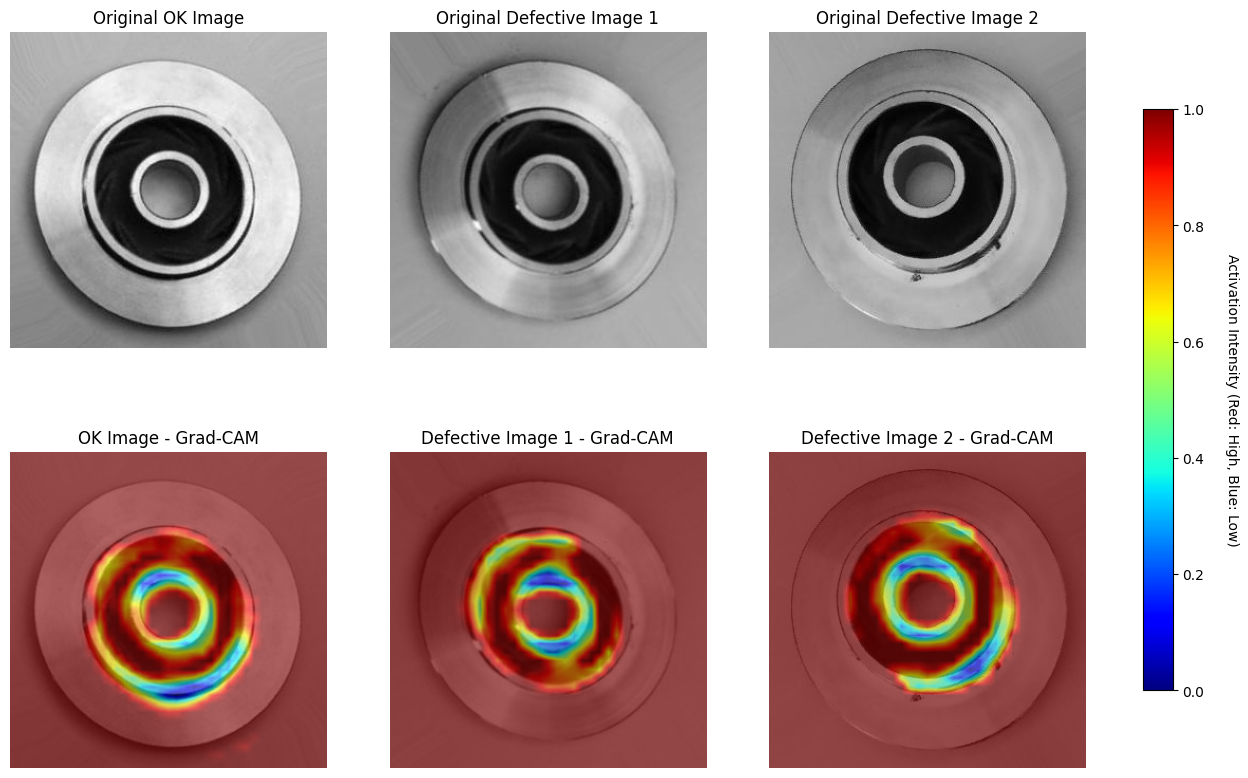

In [37]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Function to load and preprocess image
def load_image(file_path):
    img = cv2.imread(file_path)

    if img is None:
        raise ValueError(f"Error loading image: {file_path}")

    # Convert grayscale to RGB if necessary
    if len(img.shape) == 2:  # Grayscale image (single channel)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    img = cv2.resize(img, (300, 300))
    img = img / 255.0
    return img

# Function to compute Grad-CAM
def compute_gradcam(model, img_array, last_conv_layer_name):
    # Create a model that maps the input image to the activations of the last conv layer and the output
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        # Using the top predicted class for the loss
        predicted_class = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class]  # Use the predicted class for Grad-CAM

    # Compute gradients with respect to the last conv layer
    grads = tape.gradient(loss, conv_outputs)

    if grads is None:
        raise ValueError("Could not compute gradients. Check the model and inputs.")

    # Compute the mean intensity of the gradients over all the axes except the depth/channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Remove the batch dimension from conv_outputs
    conv_outputs = conv_outputs[0]

    # Convert conv_outputs to a NumPy array for safe element-wise operations
    conv_outputs = conv_outputs.numpy()
    pooled_grads = pooled_grads.numpy()  # Convert pooled_grads to a NumPy array

    # Debugging: Check the shape of pooled_grads and conv_outputs
    print(f"pooled_grads.shape: {pooled_grads.shape}")
    print(f"conv_outputs.shape: {conv_outputs.shape}")

    # Multiply each channel in the feature map by the corresponding gradient
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Compute the heatmap as the mean of the feature map across the channels
    cam = np.mean(conv_outputs, axis=-1)

    # Apply ReLU to the heatmap (eliminate negative values)
    cam = np.maximum(cam, 0)

    # Normalize the heatmap between 0 and 1
    cam = cam / np.max(cam)

    # Resize the heatmap to match the input image size
    cam = cv2.resize(cam, (img_array.shape[2], img_array.shape[1]))

    return cam

# Function to overlay the heatmap on the original image
def overlay_gradcam(heatmap, img):
    # Normalize the heatmap to range [0, 255] for the color map
    heatmap = np.uint8(255 * (heatmap / np.max(heatmap)))

    # Apply the JET colormap (which includes red at the higher range)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(heatmap, 0.6, img, 0.4, 0)
    return overlay

# Directories for OK and defective images
ok_dir = 'Pictures/test/ok_front'
def_dir = 'Pictures/test/def_front'

# Get a list of OK and defective images
ok_images = os.listdir(ok_dir)
def_images = os.listdir(def_dir)

# Randomly select 1 OK and 2 defective images
random_ok_images = np.random.choice(ok_images, 1, replace=False)
random_def_images = np.random.choice(def_images, 2, replace=False)

# Load and preprocess the images
ok_image_path = os.path.join(ok_dir, random_ok_images[0])
def_image1_path = os.path.join(def_dir, random_def_images[0])
def_image2_path = os.path.join(def_dir, random_def_images[1])

ok_img = load_image(ok_image_path)
def_img1 = load_image(def_image1_path)
def_img2 = load_image(def_image2_path)

# Prepare the images for the model
ok_img_array = np.expand_dims(ok_img, axis=0)
def_img1_array = np.expand_dims(def_img1, axis=0)
def_img2_array = np.expand_dims(def_img2, axis=0)

# The last convolutional layer name in your model (you might need to adjust this)
last_conv_layer_name = "conv2d_2"  # Replace with the actual name in your model

# Compute Grad-CAM heatmaps for OK and defective images
ok_heatmap = compute_gradcam(model, ok_img_array, last_conv_layer_name)
def_heatmap1 = compute_gradcam(model, def_img1_array, last_conv_layer_name)
def_heatmap2 = compute_gradcam(model, def_img2_array, last_conv_layer_name)

# Overlay the Grad-CAM heatmaps on the original images
ok_gradcam_overlay = overlay_gradcam(ok_heatmap, (ok_img * 255).astype(np.uint8))
def_gradcam_overlay1 = overlay_gradcam(def_heatmap1, (def_img1 * 255).astype(np.uint8))
def_gradcam_overlay2 = overlay_gradcam(def_heatmap2, (def_img2 * 255).astype(np.uint8))

# Display the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Show original OK and defective images
axs[0, 0].imshow(ok_img)
axs[0, 0].set_title("Original OK Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(def_img1)
axs[0, 1].set_title("Original Defective Image 1")
axs[0, 1].axis("off")

axs[0, 2].imshow(def_img2)
axs[0, 2].set_title("Original Defective Image 2")
axs[0, 2].axis("off")

# Show Grad-CAM overlays
axs[1, 0].imshow(ok_gradcam_overlay)
axs[1, 0].set_title("OK Image - Grad-CAM")
axs[1, 0].axis("off")

axs[1, 1].imshow(def_gradcam_overlay1)
axs[1, 1].set_title("Defective Image 1 - Grad-CAM")
axs[1, 1].axis("off")

axs[1, 2].imshow(def_gradcam_overlay2)
axs[1, 2].set_title("Defective Image 2 - Grad-CAM")
axs[1, 2].axis("off")

# Add a colorbar to visualize the activation intensity
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='jet'), ax=axs, orientation='vertical', fraction=0.025)
cbar.set_label('Activation Intensity (Red: High, Blue: Low)', rotation=270, labelpad=25)

plt.show()

### The red area is the one that is helping the Neural Network for the correct identification of OK or Defective part 